### Домашнее задание к модулю 11
В качестве домашнего задания вам предлагается создать нейронную сеть с помощью механизмов Keras, которая будет классифицировать товары из датасета fasion_mnist.

В отличие от предыдущего задания вам предлагается создать сверточную нейросеть. Подберите архитектуру сети и обучите ее на данных из датасета fasion_mnist. Попытайтесь добиться максимально возможной точности классификации за счет манипуляции параметрами сети. Сравните точность полученной сверточной сети с точностью многослойной сети из предыдущего задания. Сделайте выводы.

In [1]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from keras.datasets import fashion_mnist

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [9]:
print('train_data: ', train_data.shape)
print('train_labels: ', train_labels.shape)
print('test_data: ', test_data.shape)
print('test_labels: ', test_labels.shape)

train_data:  (60000, 28, 28)
train_labels:  (60000,)
test_data:  (10000, 28, 28)
test_labels:  (10000,)


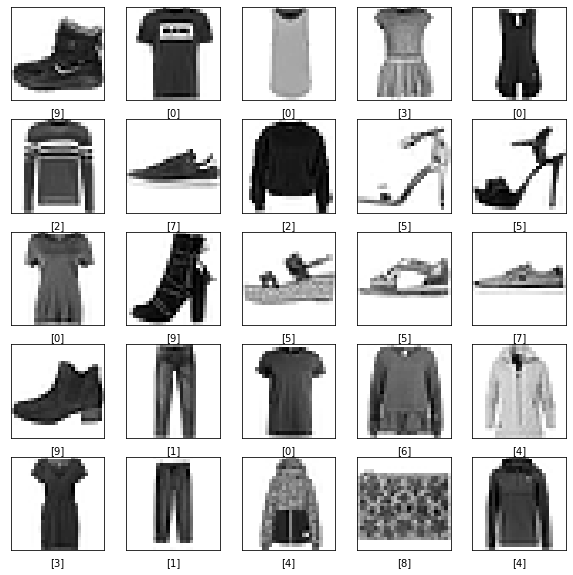

In [10]:
plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_data[i], cmap=plt.cm.binary)
    plt.xlabel([train_labels[i]])
plt.show()

In [63]:
from keras.metrics.metrics import accuracy
from keras.models import Sequential
from keras import layers

model = Sequential([
    layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.Dropout(0.5, name="Dropout"),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),

    layers.Conv2D(64, (3, 3), activation="relu"),

    layers.Flatten(),
    layers.Dense(64, activation="relu"),

    layers.Dense(10, activation="softmax"),
])

In [64]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 Dropout (Dropout)           (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 batch_normalization (BatchN  (None, 5, 5, 64)        

In [78]:
# from keras.utils import to_categorical

# train_data = train_data.reshape((60000, 28, 28, 1))
# train_data = train_data.astype("float64") / 255
# test_data = test_data.reshape((10000, 28, 28, 1))
# test_data = test_data.astype("float64") / 255
# train_labels = to_categorical(train_labels)
# test_labels = to_categorical(test_labels)

model.compile(
    # optimizer='adam',
    # loss="categorical_crossentropy",
    # metrics=['accuracy']

    optimizer="rmsprop",
    loss='sparse_categorical_crossentropy',
    metrics=["accuracy"]
)

early_stopping = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=3,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
    start_from_epoch=0,
)

history = model.fit(
    train_data,
    train_labels,
    epochs=10,
    batch_size=256,
    validation_split=0.2,
    callbacks=[early_stopping]
)

Epoch 1/10
188/188 [==============================] - 3s 10ms/step - loss: 0.1998 - accuracy: 0.9236 - val_loss: 0.2580 - val_accuracy: 0.9051
Epoch 2/10
188/188 [==============================] - 2s 8ms/step - loss: 0.1891 - accuracy: 0.9287 - val_loss: 0.2506 - val_accuracy: 0.9085
Epoch 3/10
188/188 [==============================] - 2s 8ms/step - loss: 0.1877 - accuracy: 0.9293 - val_loss: 0.2601 - val_accuracy: 0.9037
Epoch 4/10
188/188 [==============================] - 2s 8ms/step - loss: 0.1811 - accuracy: 0.9318 - val_loss: 0.2586 - val_accuracy: 0.9082
Epoch 5/10
188/188 [==============================] - 2s 9ms/step - loss: 0.1744 - accuracy: 0.9338 - val_loss: 0.2724 - val_accuracy: 0.8997


In [15]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


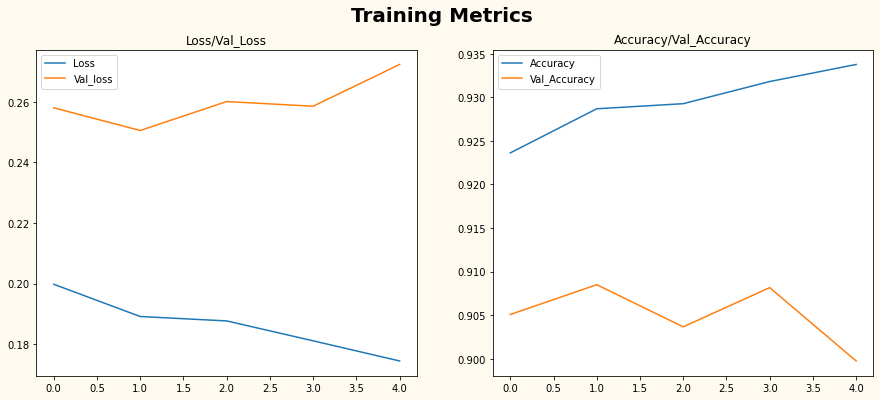

In [79]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('Training Metrics', fontsize=20, fontweight='bold')
fig.set_facecolor('floralwhite')

axes[0].set_title('Loss/Val_Loss')
axes[0].plot(history.history['loss'], label='Loss')
axes[0].plot(history.history['val_loss'], label='Val_loss')
axes[0].legend()

axes[1].set_title('Accuracy/Val_Accuracy')
axes[1].plot(history.history['accuracy'], label='Accuracy')
axes[1].plot(history.history['val_accuracy'], label='Val_Accuracy')
axes[1].legend()

plt.show()

In [80]:
results = model.evaluate(test_data, test_labels)
print(results)

313/313 [==============================] - 1s 3ms/step - loss: 0.2615 - accuracy: 0.9076
[0.261522501707077, 0.9075999855995178]


In [81]:
result = model.predict(test_data)
print(result)

313/313 [==============================] - 1s 2ms/step
[[8.95970459e-07 2.94501803e-07 1.42351553e-06 ... 2.32652179e-03
  1.51103194e-07 9.97438192e-01]
 [5.61199326e-04 7.04023114e-06 9.98264968e-01 ... 1.40615532e-06
  1.06880952e-06 6.86961172e-08]
 [4.74128386e-13 1.00000000e+00 2.49309341e-12 ... 6.20573077e-16
  3.40741060e-14 7.18337706e-18]
 ...
 [6.24707230e-12 6.51983133e-13 4.71432951e-13 ... 6.79414953e-14
  1.00000000e+00 1.26522396e-14]
 [2.50904193e-11 1.00000000e+00 1.02009790e-09 ... 2.94849838e-13
  4.67753603e-13 5.46279119e-15]
 [7.56364956e-04 7.32022272e-06 2.78632015e-05 ... 6.01418912e-01
  1.48047472e-03 1.19214710e-02]]


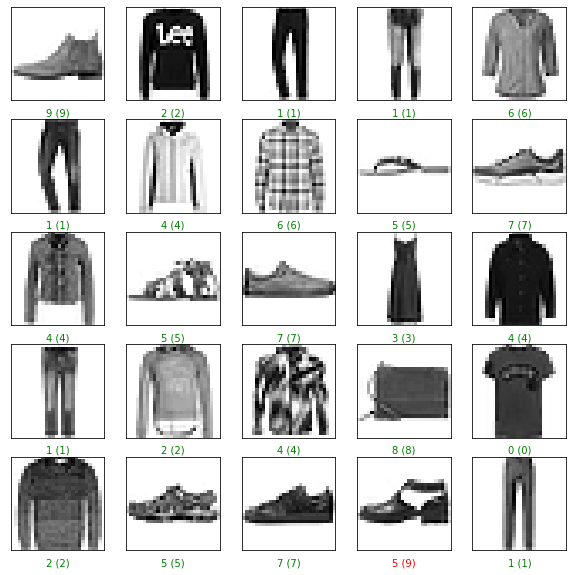

In [82]:
plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    pred_y = np.argmax(result[i])
    true_y = test_labels[i]

    if pred_y == true_y:
      color ="green"
    else:
      color ="red"
    plt.imshow(test_data[i], cmap=plt.cm.binary)
    plt.xlabel("{} ({})".format(pred_y, true_y), color=color)
plt.show()

In [ ]:
model.save("fashion_model")